In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Vasicek Model

In [5]:
np.random.seed(2)
n = 1_000_000
delta_t = 1
T = 10

alpha = 0.006
beta = 0.1
sigma = 0.01
r0 = 0.045

R = np.zeros(shape=(n,11))
R[:,0] = r0
for i in range(0,10):
    R[:,i+1] = R[:,i] + ((alpha-beta*R[:,i].reshape(n,1))*delta_t 
                + sigma*np.random.normal(size=(n,1))*np.sqrt(delta_t)).reshape(n)

In [6]:
R[:5,:]

array([[0.045     , 0.04233242, 0.03131411, 0.04371867, 0.05136663,
        0.063343  , 0.0732561 , 0.08181181, 0.08322572, 0.07492604,
        0.07582242],
       [0.045     , 0.04593733, 0.04663645, 0.03103472, 0.02802641,
        0.04195108, 0.0582357 , 0.03063207, 0.04113221, 0.0328865 ,
        0.04675569],
       [0.045     , 0.02513804, 0.02029268, 0.0202159 , 0.01296519,
        0.02508064, 0.04333032, 0.03231395, 0.03130121, 0.02683234,
        0.02123987],
       [0.045     , 0.06290271, 0.07528649, 0.07162182, 0.06081527,
        0.06641935, 0.06575184, 0.0502374 , 0.05350612, 0.07174401,
        0.05943629],
       [0.045     , 0.02856564, 0.03316856, 0.03139747, 0.05016621,
        0.0466481 , 0.04981494, 0.05965371, 0.06019793, 0.06132188,
        0.06238466]])

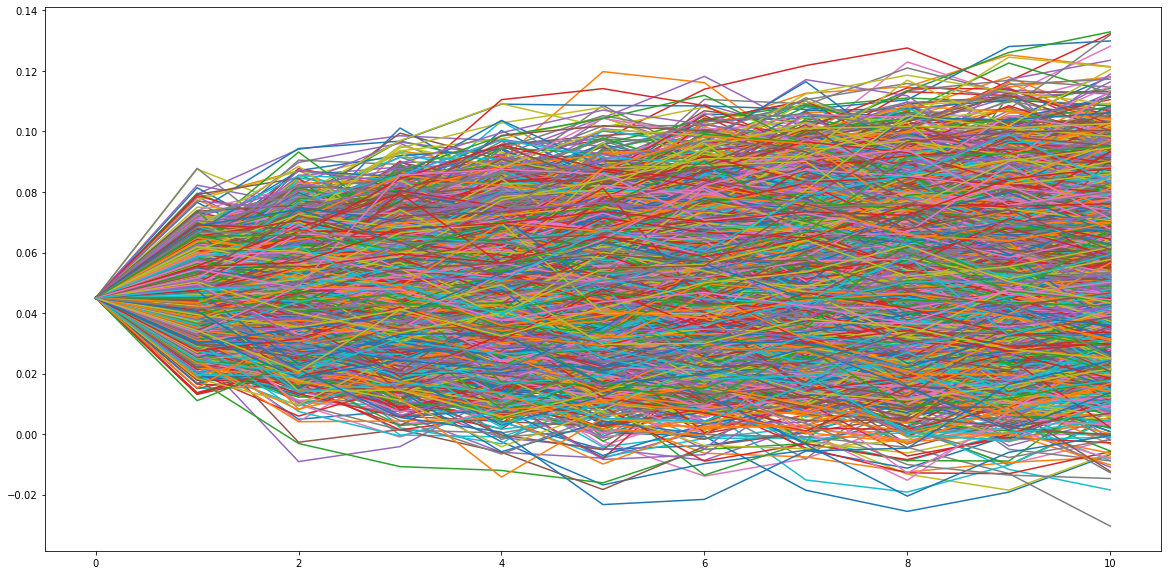

In [91]:
plt.figure(figsize=[20,10])
plt.plot(R[:5000,:].T);

# Q1 

In [86]:
T = np.concatenate((np.arange(1,11),np.arange(1,11)+.25))
D_T = {}
for i in T:
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    D_T[i] = A_T*np.exp(-B_T*r0)
for i in range(1,11):
    D_t_T = (D_T[i+.25]/D_T[i])
    
    print(((1/D_t_T)-1)*4)

0.046810686591334694
0.047973303764632824
0.04896248308954121
0.04980607505833312
0.0505272346923098
0.051145235588914595
0.051676141021807176
0.05213335722806889
0.052528089641308284
0.05286971919612693


# Q2

In [8]:
T = np.concatenate((np.arange(1,11),np.arange(1,11)+.25))
D_T = {}
for i in T:
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    D_T[i] = A_T*np.exp(-B_T*r0)
    
for i in np.arange(1,11):
    print(i,"x",i+.25,":",3/12*( (D_T[i]/D_T[i+.25]) - 1))

1 x 1.25 : 0.0029256679119584184
2 x 2.25 : 0.0029983314852895515
3 x 3.25 : 0.0030601551930963256
4 x 4.25 : 0.0031128796911458756
5 x 5.25 : 0.0031579521682693623
6 x 6.25 : 0.003196577224307162
7 x 7.25 : 0.0032297588138629485
8 x 8.25 : 0.0032583348267543055
9 x 9.25 : 0.0032830056025817123
10 x 10.25 : 0.003304357449757933


In [9]:
T

array([ 1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,  9.  ,
       10.  ,  1.25,  2.25,  3.25,  4.25,  5.25,  6.25,  7.25,  8.25,
        9.25, 10.25])

# Q3 

# Vasicek Model with sigma = 0.02

In [10]:
np.random.seed(2)
n = 1_000_000
delta_t = 1
T = 10

alpha = 0.006
beta = 0.1
sigma = 0.02
r0 = 0.045

R = np.zeros(shape=(n,11))
R[:,0] = r0
for i in range(0,10):
    R[:,i+1] = R[:,i] + ((alpha-beta*R[:,i].reshape(n,1))*delta_t 
                + sigma*np.random.normal(size=(n,1))*np.sqrt(delta_t)).reshape(n)

In [13]:
T = np.concatenate((np.arange(1,11),np.arange(1,11)+.25))
D_T = {}
for i in T:
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    D_T[i] = A_T*np.exp(-B_T*r0)
for i in range(1,11):
    D_t_T = (D_T[i+.25]/D_T[i])
#     print(D_t_T)
    print(((1/D_t_T)-1)*4)

0.04663832398879375
0.047416617050614285
0.04786868485343643
0.04807120957855293
0.048085347981060345
0.0479596801910569
0.04773261923923933
0.04743437649563642
0.04708856228656355
0.04671348740963399


In [12]:
T = np.concatenate((np.arange(1,11),np.arange(1,11)+.25))
D_T = {}
for i in T:
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    D_T[i] = A_T*np.exp(-B_T*r0)

for i in np.arange(1,11):
    print(i,"x",i+.25,":",3/12*( (D_T[i]/D_T[i+.25]) - 1))

1 x 1.25 : 0.0029148952492996094
2 x 2.25 : 0.002963538565663393
3 x 3.25 : 0.0029917928033397767
4 x 4.25 : 0.003004450598659558
5 x 5.25 : 0.0030053342488162715
6 x 6.25 : 0.002997480011941056
7 x 7.25 : 0.002983288702452458
8 x 8.25 : 0.0029646485309772763
9 x 9.25 : 0.002943035142910222
10 x 10.25 : 0.0029195929631021245


# Q4 

In [60]:
np.random.seed(2)
n = 1_000_000
delta_t = 1
T = 10

alpha = 0.006
beta = 0.1
sigma = 0.01
r0 = 0.045

R = np.zeros(shape=(n,11))
R[:,0] = r0
for i in range(0,10):
    R[:,i+1] = R[:,i] + ((alpha-beta*R[:,i].reshape(n,1))*delta_t 
                + sigma*np.random.normal(size=(n,1))*np.sqrt(delta_t)).reshape(n)

In [61]:
Act_D_T = {}
for i in np.arange(1,11):
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    Act_D_T[i] = A_T*np.exp(-B_T*r0)

Act_D_T

{1: 0.9553188310376337,
 2: 0.9114718770662944,
 3: 0.868696730028089,
 4: 0.8271665394633642,
 5: 0.7870027635945575,
 6: 0.748285688744693,
 7: 0.7110630399768659,
 8: 0.6753569850593639,
 9: 0.6411698021494523,
 10: 0.6084884461642587}

In [62]:
Sim_D_T = {}
for i in np.arange(1,11):
    Sim_D_T[i] = np.average(np.exp(-np.average(R[:,:i+1], axis=1)*i))

Sim_D_T

{1: 0.9552973424994259,
 2: 0.9113884809150069,
 3: 0.8685379009132197,
 4: 0.8269126775735743,
 5: 0.7866574575238958,
 6: 0.7478413091800121,
 7: 0.7105277248648283,
 8: 0.6747397123107296,
 9: 0.6404793136418826,
 10: 0.6077251342486784}

# Q5 

In [63]:
#Assume maturity of swap to be 10 years

In [64]:
D_T = {}
for i in np.arange(0.5,10.5,0.5):
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    D_T[i] = A_T*np.exp(-B_T*r0)
2*(100-100*D_T[10])/np.sum([i for i in D_T.values()])

4.999456972983593

# Q6 

In [65]:
avg_rates = np.zeros((n,11))
for i in range(0,11):
    avg_rates[:,i] = (np.average(R[:,:i+1], axis=1))
    
R_T = np.zeros((n,9))
for j in np.arange(1,10):
    i = 1
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    D_T = A_T*np.exp(-B_T*R[:,j])
    R_T[:,j-1] = (np.sqrt(1/D_T)-1)*2

R_cash_flow = np.where((R_T<0.07)&(R_T>0.04), 1, 0) * R_T* 100

exp_avg_rate = np.zeros((n,9))
for i in range(2,11):
    exp_avg_rate[:,i-2] = np.exp(-avg_rates[:,i]*i)
price = np.average(np.sum(exp_avg_rate*R_cash_flow, axis=1))

print("$",price)

$ 22.3694164829966


# Q7 

In [115]:
D_T = {}
for i in np.arange(0.5,10.5,0.5):
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    D_T[i] = A_T*np.exp(-B_T*r0)

R_T = np.zeros((n,4))
for j in range(1,5):
    i = 1
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    D_T_t = A_T*np.exp(-B_T*R[:,j])
    R_T[:,j-1] = (1/D_T_t)-1
R_T = np.average(2*R_T-0.06, axis=0)
price = 0
for j,i in enumerate(R_T):
    price += i*D_T[j+2]
price += 100*D_T[5]
price

78.83718183087984

# Q8

In [66]:
def fsr(N, M, D_T):
    num = 100*D_T[N] - 100*D_T[N+M]
    den = np.sum([D_T[N+(i/2)] for i in range(1,2*M+1)])
    return 2*(num/den)/100

def FR_bond_price(N,M,fsr,R):
    r = R[:,N]
    D_T = np.zeros((n,2*M)) #D_T as of time=N
    for i in np.arange(0.5,M+0.5,0.5):
        A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
        B_T = (1/beta)*(1-np.exp(-beta*i))
        D_T[:,int(2*i)-1] = np.array(A_T*np.exp(-B_T*r))
#     print(D_T)
    sum_D_T = np.sum(D_T, axis=1)
    return 100*fsr/2*sum_D_T + 100*D_T[:,-1]

In [70]:
D_T = {} #D_T today
for i in np.arange(0.5,11,0.5):
    A_T = np.exp((( (sigma**2)/(2*beta**2) )-( alpha/beta ))*i + (( alpha/(beta**2) )-( (sigma**2)/(beta**3) ))*(1-np.exp(-beta*i)) + ( (sigma**2)/(4*beta**3) )*( (1-np.exp(-2*beta*i)) ))
    B_T = (1/beta)*(1-np.exp(-beta*i))
    D_T[i] = A_T*np.exp(-B_T*r0)

prices_1by1 = FR_bond_price(1,1,fsr(1,1,D_T),R)
prices_1by5 = FR_bond_price(1,5,fsr(1,5,D_T),R)
prices_5by5 = FR_bond_price(5,5,fsr(5,5,D_T),R)

In [71]:
print(np.average(D_T[1] * np.where((prices_1by1-100)<0,0,prices_1by1-100)))
print(np.average(D_T[1] * np.where((prices_1by5-100)<0,0,prices_1by5-100)))
print(np.average(D_T[5] * np.where((prices_5by5-100)<0,0,prices_5by5-100)))

0.3535456945763243
1.343196361905639
1.9317977012419212
